## Rede Perceptron

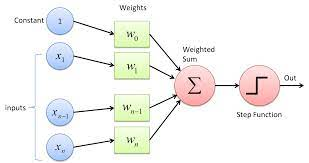

## Implementação da Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0

    def output(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation >= 0 else 0

    def train(self, training_inputs, labels, epochs=10, learning_rate=1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.output(inputs)
                self.weights += learning_rate * (label - prediction) * inputs
                self.bias += learning_rate * (label - prediction)

### Porta Lógica AND


In [ ]:

# Definindo os dados de treinamento AND
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
saidas_desejadas = np.array([0, 0, 0, 1])


perceptron = Perceptron(input_size=2)
perceptron.train(entradas, saidas_desejadas, epochs=10, learning_rate=0.1)


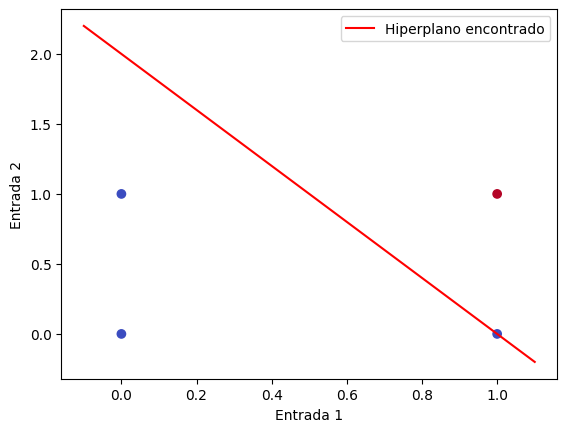

In [ ]:
# Função para plotar o hiperplano
def plot_hyperplane(w, b):
    x = np.linspace(-0.1, 1.1, 100)
    y = (-b - w[0] * x) / w[1]
    plt.plot(x, y, 'r-', label='Hiperplano encontrado')

# Plotando o hiperplano
plot_hyperplane(perceptron.weights, perceptron.bias)
plt.scatter(entradas[:, 0], entradas[:, 1], c=saidas_desejadas, cmap='coolwarm')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.show()



## Utilizando o framework TensorFlow

In [ ]:
import tensorflow as tf

# Criando o modelo do perceptron
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,))
])

modelo.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compilando o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
# Treinando o modelo
modelo.fit(entradas, saidas_desejadas, epochs=50)
# Testando o modelo
predicoes = modelo.predict(entradas)
print(predicoes)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6694 - mse: 0.2381
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6691 - mse: 0.2380
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6689 - mse: 0.2379
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6686 - mse: 0.2377
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6684 - mse: 0.2376
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6681 - mse: 0.2375
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6679 - mse: 0.2374
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6676 - mse: 0.2373
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6674 - mse: 0.2371
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6671 - mse: 0.2370
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6669 - mse: 

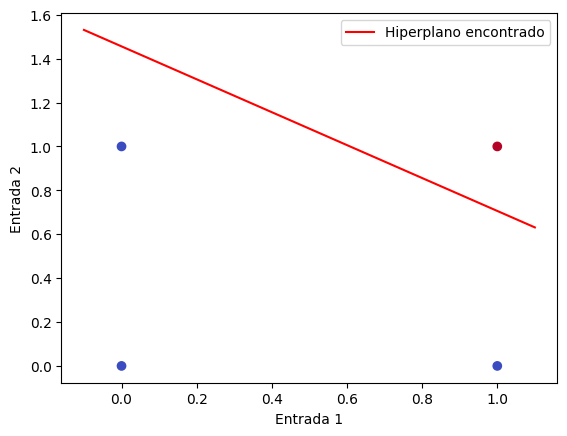

In [ ]:
# Obtendo os pesos do perceptron treinado
pesos = modelo.get_weights()[0]
bias = modelo.get_weights()[1]
# Plotando o hiperplano
plot_hyperplane(pesos, bias)
plt.scatter(entradas[:, 0], entradas[:, 1], c=saidas_desejadas, cmap='coolwarm')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.show()